In [20]:
import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets
print(torchtext.__version__)


0.9.0


In [22]:
# create Field objects
SESSION_ID = data.Field()
TIMESTAMP = data.Field()
USER_ID = data.Field()
PRODUCT_ID = data.Field()
EVENT_TYPE = data.Field()
OFFERED_DISCOUNT = data.Field()
PURCHASE_ID = data.Field()

# create a dictionary representing the dataset
fields = {
  'session_id': ('session_id', SESSION_ID),
  'timestamp': ('timestamp', TIMESTAMP),
  'user_id': ('user_id', USER_ID),
  'product_id': ('product_id', PRODUCT_ID),
  'event_type': ('event_type', EVENT_TYPE),
  'offered_discount': ('offered_discount', OFFERED_DISCOUNT),
  'purchase_id': ('purchase_id', PURCHASE_ID)
}

# load the dataset in json format
train_ds, valid_ds, test_ds = data.TabularDataset.splits(
  path = 'data',
  train = 'sessions.jsonl',
  validation = 'sessions.jsonl',
  test = 'sessions.jsonl',
  format = 'json',
  fields = fields
)




In [24]:
# check an example
print(vars(train_ds[0]))
print(vars(train_ds[2]))

{'session_id': 100001, 'timestamp': ['2021-01-27T08:29:10'], 'user_id': 102, 'product_id': 1233, 'event_type': ['VIEW_PRODUCT'], 'offered_discount': 0, 'purchase_id': None}
{'session_id': 100001, 'timestamp': ['2021-01-27T08:36:37'], 'user_id': 102, 'product_id': None, 'event_type': ['BUY_PRODUCT'], 'offered_discount': 0, 'purchase_id': 20001}


In [26]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
data = pd.read_json(os.path.abspath('') + "/data/sessions.jsonl", lines=True)
data = data[['session_id','timestamp','user_id','product_id','event_type','offered_discount','purchase_id']]

cleanup = {"event_type":{"BUY_PRODUCT":1, "VIEW_PRODUCT":-1}}
data = data.replace(cleanup)
#data = data.fillna(0)

In [28]:
data[0:100]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-01-27 08:29:10,102.0,1233.0,-1,0,NaN
1,100001,2021-01-27 08:32:04,102.0,1234.0,-1,0,NaN
2,100001,2021-01-27 08:36:37,102.0,NaN,1,0,20001.0
3,100002,2021-02-01 08:17:36,102.0,1072.0,-1,0,NaN
4,100002,2021-02-01 08:22:30,102.0,1073.0,-1,0,NaN
...,...,...,...,...,...,...,...
95,100019,2021-02-21 22:09:25,102.0,1001.0,-1,0,NaN
96,100019,2021-02-21 22:13:44,102.0,1001.0,1,0,20006.0
97,100020,2021-02-24 21:55:09,102.0,1278.0,-1,0,NaN
98,100020,2021-02-24 21:55:52,102.0,1281.0,-1,0,NaN


<AxesSubplot:>

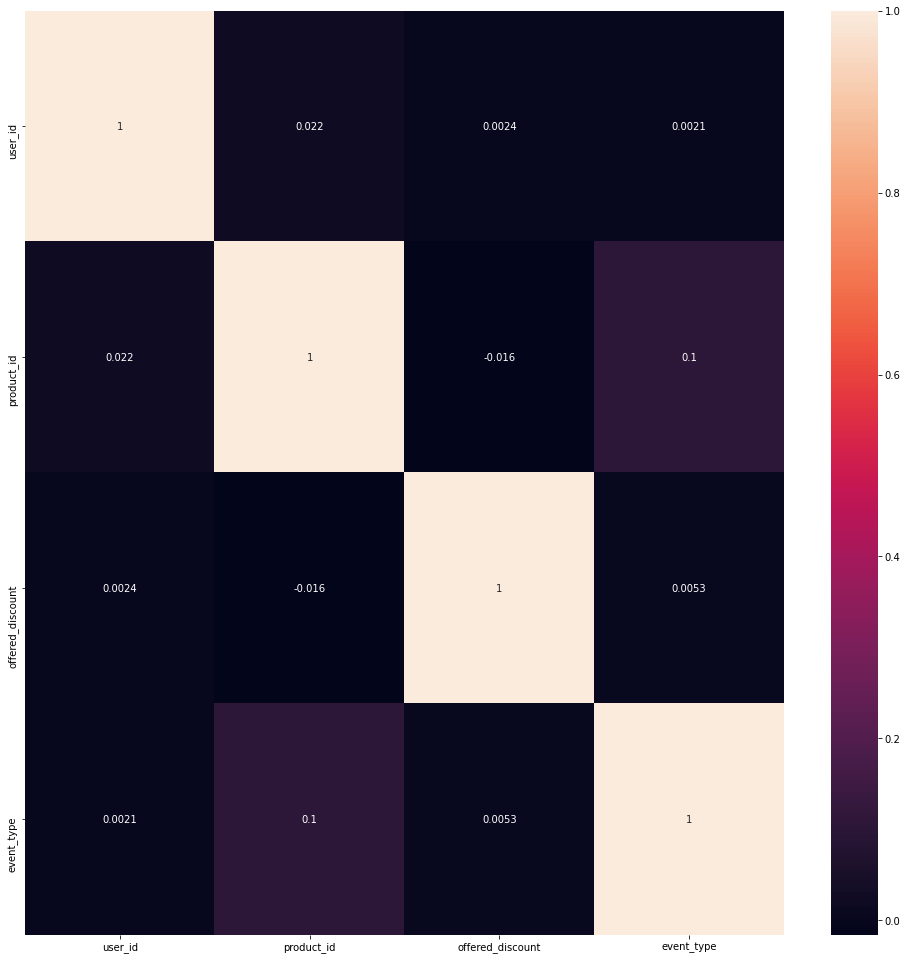

In [30]:

plt.figure(figsize=(17,17))
valuable_data = ['timestamp','user_id', 'product_id', 'offered_discount', 'event_type' ]
sns.heatmap(data[valuable_data].corr(),annot = True)

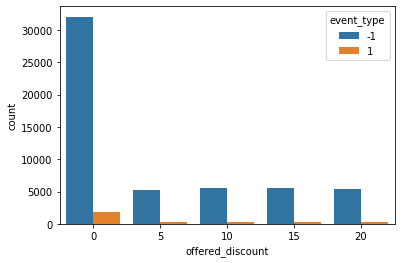

In [32]:

g = sns.countplot(x="offered_discount",hue="event_type",data=data)

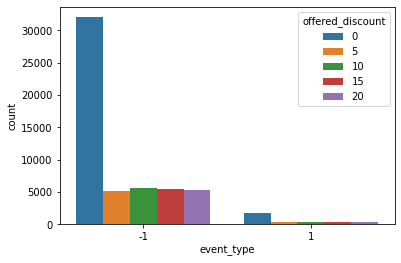

In [34]:
g2 = sns.countplot(x="event_type",hue="offered_discount",data=data)

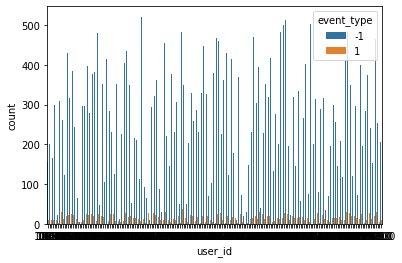

In [36]:
g3 = sns.countplot(x='user_id',hue='event_type',data=data)

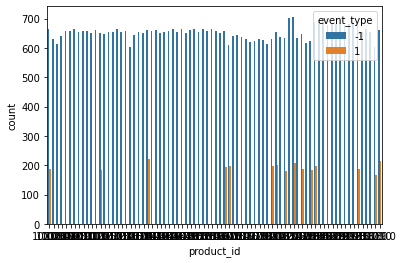

In [38]:
g4 = sns.countplot(x='product_id',hue='event_type',data=data)

In [40]:
d1 = data[data.event_type == 1].groupby(['offered_discount']).count()['event_type']
d1

offered_discount
0     1790
5      311
10     298
15     332
20     322
Name: event_type, dtype: int64

In [42]:
d2 = data.groupby(['offered_discount']).count()['event_type']
d2

offered_discount
0     33803
5      5495
10     5906
15     5880
20     5640
Name: event_type, dtype: int64

In [44]:
d3 = d1/d2
d3

offered_discount
0     0.052954
5     0.056597
10    0.050457
15    0.056463
20    0.057092
Name: event_type, dtype: float64

<AxesSubplot:title={'center':'buy to all'}, xlabel='offered_discount'>

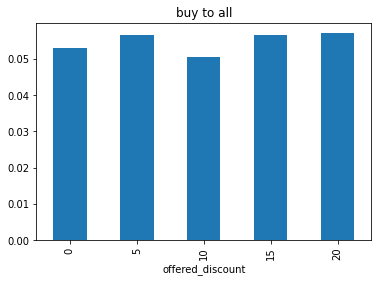

In [46]:
d3.plot(kind='bar',title='buy to all')

In [48]:
d4 = data[data.event_type == 1]
d4.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,100001,2021-01-27 08:36:37,102.0,NaN,1,0,20001.0
8,100002,2021-02-01 08:30:37,102.0,1222.0,1,0,20002.0
43,100008,2021-01-06 07:06:04,102.0,1057.0,1,5,20003.0
46,100009,2021-02-24 13:57:36,NaN,1277.0,1,0,20004.0
53,100011,2021-03-06 12:57:19,102.0,NaN,1,0,20005.0


<AxesSubplot:xlabel='product_id', ylabel='count'>

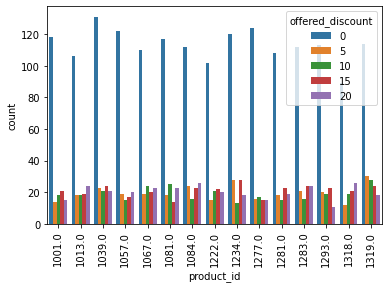

In [50]:
g_prod_disc = sns.countplot(x='product_id',hue='offered_discount',data=d4)
g_prod_disc.set_xticklabels(g_prod_disc.get_xticklabels(), rotation=90)
g_prod_disc

In [52]:

d7 = data[data.product_id.isin(d4.product_id)][valuable_data].dropna().sort_values(by = ['user_id','product_id','timestamp'])
d7

,timestamp,user_id,product_id,offered_discount,event_type
95,2021-02-21 22:09:25,102.0,1001.0,0,-1
96,2021-02-21 22:13:44,102.0,1001.0,0,1
63,2021-01-01 04:02:07,102.0,1013.0,0,-1
136,2021-01-22 07:09:22,102.0,1013.0,0,-1
109,2021-03-15 03:49:29,102.0,1013.0,0,-1
...,...,...,...,...,...
56688,2021-01-08 09:59:50,301.0,1319.0,10,-1
56621,2021-02-18 22:24:13,301.0,1319.0,0,-1
56646,2021-03-10 07:49:50,301.0,1319.0,0,-1
56647,2021-03-10 07:51:58,301.0,1319.0,0,1


czas od ostatniego zakupu/pierwszego spojrzenia, ilość wejść w tym czasie, maksymalna zaoferowana zniżka, obecna zniżka, czy kupił

niezdecydowany: patrzył i nie kupił, dostał zniżkę i nie kupił
zdecydowany: dostał zniżkę nie kupił ale i tak kupił później, kupił od razu

In [54]:
dd7 = d7.groupby(["user_id", "product_id"]).get_group((102,1067))
dd7.timestamp = dd7['timestamp'].diff()
dd7

/home/tisek/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,timestamp,user_id,product_id,offered_discount,event_type
125,NaT,102.0,1067.0,0,-1
126,0 days 00:02:32,102.0,1067.0,0,1
20,37 days 20:26:22,102.0,1067.0,0,-1
52,25 days 20:06:06,102.0,1067.0,0,-1


# Patera

In [56]:
import numpy as np
clean_data = data
for i, d in clean_data.iterrows():
    if d.isnull().product_id and d.event_type == 1:
        clean_data.at[i,'product_id'] = clean_data.at[i-1,'product_id']
    if d.isnull().user_id:
        clean_data.at[i,'user_id'] = data[data.session_id == d.session_id]['user_id'].dropna().mean()
clean_data = clean_data[valuable_data]


In [57]:
clean_data

,timestamp,user_id,product_id,offered_discount,event_type
0,2021-01-27 08:29:10,102.0,1233.0,0,-1
1,2021-01-27 08:32:04,102.0,1234.0,0,-1
2,2021-01-27 08:36:37,102.0,1234.0,0,1
3,2021-02-01 08:17:36,102.0,1072.0,0,-1
4,2021-02-01 08:22:30,102.0,1073.0,0,-1
...,...,...,...,...,...
56719,2021-03-12 08:18:09,301.0,NaN,10,-1
56720,2021-03-12 08:21:03,301.0,1039.0,10,-1
56721,2021-02-02 05:38:37,301.0,1035.0,0,-1
56722,2021-02-02 05:38:42,301.0,1067.0,0,-1


In [58]:
sorted_data = clean_data[valuable_data].dropna().sort_values(by = ['user_id','product_id','timestamp'])

In [59]:
dic = [x for _, x in sorted_data.groupby(["user_id", "product_id"])] 


In [60]:
split_dic = []
for d in dic:
    last = 0
    for i in range(len(d)):
        if d.iloc[i].event_type == 1:
            split_dic.append(d[last:i+1])
            last = i+1
    if last < len(d):
        split_dic.append(d[last:len(d)])

In [61]:
for d in split_dic:
    t1 = d['timestamp'].diff()
    d.timestamp = t1

/home/tisek/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
split_dic[3]

,timestamp,user_id,product_id,offered_discount,event_type
56,NaT,102.0,1006.0,0,-1
129,21 days 03:19:13,102.0,1006.0,0,-1
102,51 days 20:41:30,102.0,1006.0,0,-1


In [63]:
final_data = []
for d in split_dic:
    n_visits = len(d)
    d_time = d.sum().timestamp.total_seconds()
    max_disc = d.max().offered_discount
    curr_disc = d.tail(1).offered_discount.item()
    is_purchased = d.tail(1).event_type.item()
    final_data.append([d_time,n_visits,max_disc,curr_disc,is_purchased]) 

In [64]:
df = pd.DataFrame(final_data,columns=["d_time","n_visits","max_disc","curr_disc","is_purchased"])
df

,d_time,n_visits,max_disc,curr_disc,is_purchased
0,259.0,2,0,0,1
1,6307192.0,3,0,0,-1
2,6307195.0,3,0,0,-1
3,6307243.0,3,0,0,-1
4,6307206.0,3,0,0,-1
...,...,...,...,...,...
15733,5308791.0,4,15,15,-1
15734,5308657.0,4,15,15,-1
15735,0.0,1,15,15,-1
15736,5262728.0,4,10,0,1


In [65]:
df = df[df.n_visits > 1]

In [66]:
df.to_json(r'data/final.json',orient="records",lines=True)

<AxesSubplot:>

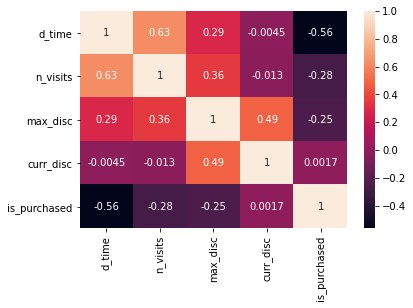

In [67]:
sns.heatmap(df.corr(),annot = True)

In [68]:
normal_t = df['d_time']
normalized_df = df
normalized_df.d_time = (normal_t-normal_t.min())/(normal_t.max()-normal_t.min())

/home/tisek/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
normalized_df.to_json(r'data/normal_final.json',orient="records",lines=True)

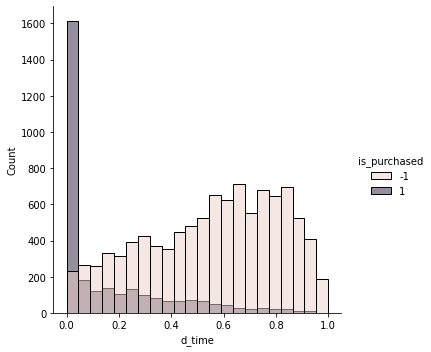

In [70]:
g_n1 = sns.displot(data = normalized_df,x='d_time',hue="is_purchased")

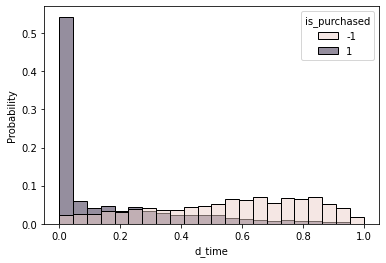

In [71]:
g_n2 = sns.histplot(data = normalized_df,x='d_time',hue="is_purchased",stat="probability",common_norm=False)

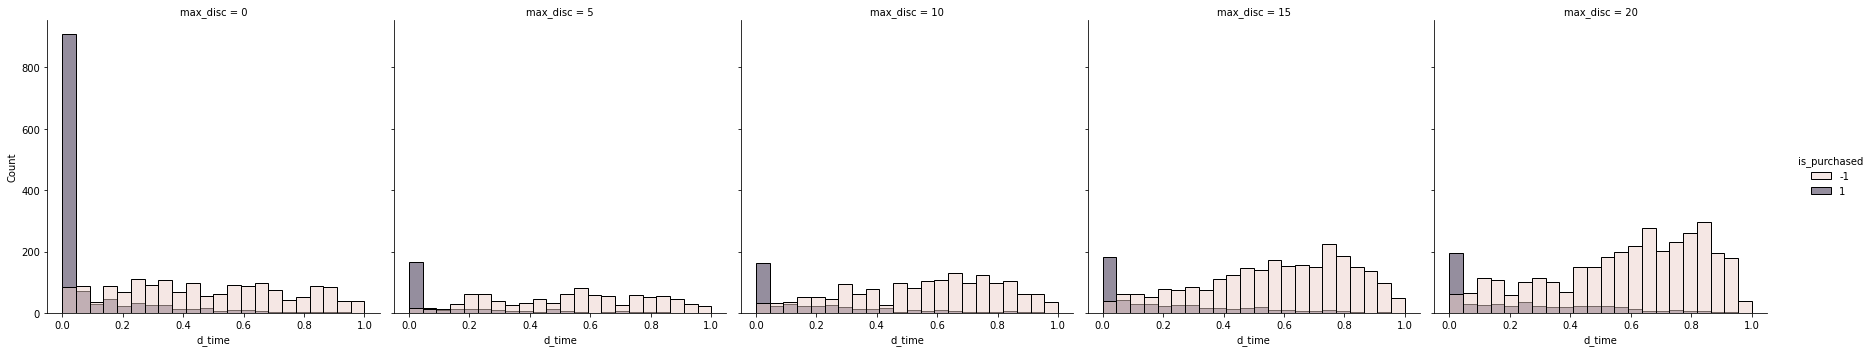

In [72]:
g_n3 = sns.displot(data = normalized_df,x='d_time',col="max_disc",hue="is_purchased")

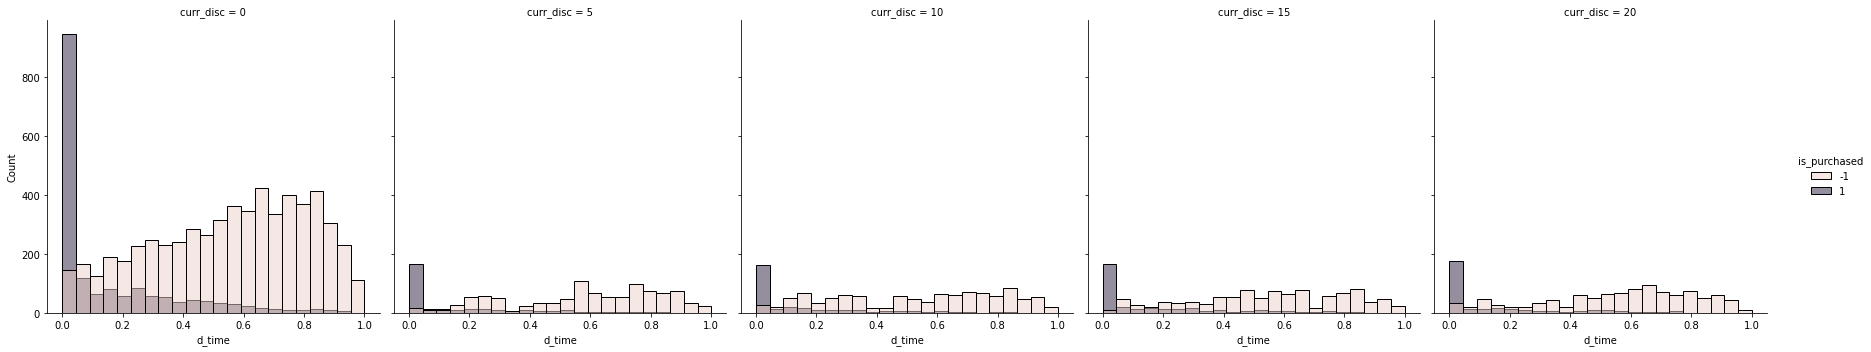

In [73]:
g_n4 = sns.displot(data = normalized_df,x='d_time',col="curr_disc",hue="is_purchased")

In [74]:
df = pd.DataFrame(final_data,columns=["d_time","n_visits","max_disc","curr_disc","is_purchased"])
df = df[df.n_visits > 1]
len(df[(df.is_purchased == 1) & (df.curr_disc != 0) & (df.d_time > 3600) & (df.n_visits < 4) ])

335